In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,A Lélek órása,1923
1,Aizaugusa gravi viegli krist,1986
2,Agliyorum,1988
3,0_1_0,2008
4,97 fung lau mung,1994


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


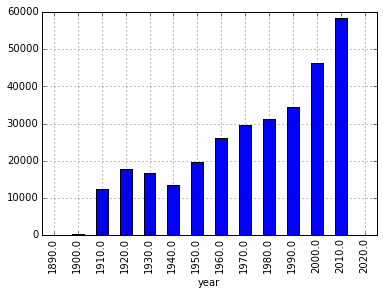

In [29]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of film.

t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

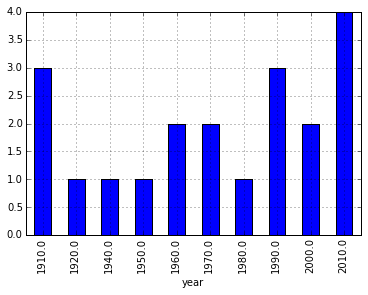

In [30]:
# Use groupby() to plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

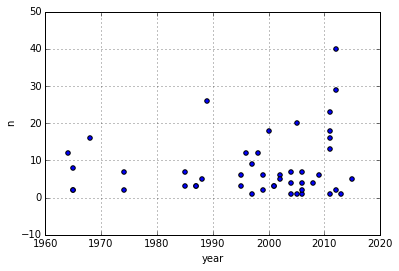

In [46]:
# Sort by year the movies in which Judi Dench has acted,
# and guess whether you can see a trajectory in his `n` value.

c = cast
c = c[c.name == 'Judi Dench'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [184]:
# Sort by year the movies in which Cary Grant acted,
# and guess whether you can see a trajectory in his `n` value.

c = cast
c[c.name == 'Cary Grant'].sort('year')

,title,year,name,type,character,n
2282376,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3
2338273,Merrily We Go to Hell,1932,Cary Grant,actor,'DeBrion' in play,9
2341589,Madame Butterfly,1932,Cary Grant,actor,Lieutenant B.F. Pinkerton,2
2352398,This Is the Night,1932,Cary Grant,actor,Stephen Mathewson,5
925776,Merrily We Go to Hell,1932,Cary Grant,actor,Charlie Baxter,9
412390,Sinners in the Sun,1932,Cary Grant,actor,Ridgeway,8
2341270,Hot Saturday,1932,Cary Grant,actor,Romer Sheffield,1
2363161,Devil and the Deep,1932,Cary Grant,actor,Lt. Jaeckel,4
1687488,Alice in Wonderland,1933,Cary Grant,actor,Mock Turtle,10
1471854,I'm No Angel,1933,Cary Grant,actor,Jack Clayton,2


In [208]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      8050
actress    3765
dtype: int64

In [209]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actor      5632
actress    5543
dtype: int64

In [210]:
# How many total roles were available for actors,
# and how many for actresses, over the 1950s?

c = cast
c = c[c.year // 10 == 195]
c.type.value_counts()

actor      178789
actress     69946
dtype: int64